# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('Credit Card Churn - Dataset.csv')
df.head()

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   client_id                     5000 non-null   int64  
 1   label                         5000 non-null   int64  
 2   usia                          5000 non-null   int64  
 3   gender                        5000 non-null   object 
 4   jumlah_tanggungan             5000 non-null   int64  
 5   pendidikan                    5000 non-null   object 
 6   status_nikah                  5000 non-null   object 
 7   penghasilan_tahunan           5000 non-null   object 
 8   tipe_kartu_kredit             5000 non-null   object 
 9   lama_nasabah                  5000 non-null   int64  
 10  jumlah_produk                 5000 non-null   int64  
 11  bulan_nonactive               5000 non-null   int64  
 12  jumlah_kontak                 5000 non-null   int64  
 13  tot

## Cek missing value

In [5]:
df.isna().sum()

client_id                       0
label                           0
usia                            0
gender                          0
jumlah_tanggungan               0
pendidikan                      0
status_nikah                    0
penghasilan_tahunan             0
tipe_kartu_kredit               0
lama_nasabah                    0
jumlah_produk                   0
bulan_nonactive                 0
jumlah_kontak                   0
total_limit_kredit              0
total_limit_kredit_dipakai      0
sisa_limit_kredit               0
rasio_transaksi_Q4_Q1           0
total_transaksi                 0
jumlah_transaksi                0
rasio_jumlah_transaksi_Q4_Q1    0
rasio_pemakaian                 0
dtype: int64

## Cek data duplikat

In [6]:
df.duplicated().sum()

np.int64(0)

##Melihat nilai unik pada setiap fitur

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

for i in categorical_columns:
    print(df[i].value_counts())
    print("\n===========\n")

gender
F    2675
M    2325
Name: count, dtype: int64


pendidikan
Graduate         1508
High School       998
Uneducated        755
Unknown           743
College           512
Post-Graduate     259
Doctorate         225
Name: count, dtype: int64


status_nikah
Married     2300
Single      1956
Unknown      390
Divorced     354
Name: count, dtype: int64


penghasilan_tahunan
Less than $40K    1763
$40K - $60K        890
$80K - $120K       760
$60K - $80K        666
Unknown            561
$120K +            360
Name: count, dtype: int64


tipe_kartu_kredit
Blue        4652
Silver       278
Gold          59
Platinum      11
Name: count, dtype: int64




> Ditemukan adanya nilai `Unknown` pada fitur `pendidikan`, `status_nikah`, dan `penghasilan_tahunan` yang berarti nilai tersebut adalah `missing value`.

> Pada kolom status_nikah ada nilai divorced yang berarti nasabah tersebut single. Nilai tersebut akan diganti pada cell dibawah.



In [8]:
# Mengganti nilai 'Divorced' menjadi 'Single' -> karena divorced == single
df['status_nikah'] = df['status_nikah'].replace('Divorced', 'Single')

df['status_nikah'].value_counts()

status_nikah
Single     2310
Married    2300
Unknown     390
Name: count, dtype: int64

> Proses selanjutnya adalah mengganti nilai `'Unknown'` dengan `NaN` agar bisa dilihat dengan fungsi isna() dan bisa dilakukan imputasi

In [9]:
df.replace('Unknown', np.nan, inplace=True)

In [10]:
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n===========\n")

gender
F    2675
M    2325
Name: count, dtype: int64


pendidikan
Graduate         1508
High School       998
Uneducated        755
College           512
Post-Graduate     259
Doctorate         225
Name: count, dtype: int64


status_nikah
Single     2310
Married    2300
Name: count, dtype: int64


penghasilan_tahunan
Less than $40K    1763
$40K - $60K        890
$80K - $120K       760
$60K - $80K        666
$120K +            360
Name: count, dtype: int64


tipe_kartu_kredit
Blue        4652
Silver       278
Gold          59
Platinum      11
Name: count, dtype: int64




In [11]:
df.isna().sum()

client_id                         0
label                             0
usia                              0
gender                            0
jumlah_tanggungan                 0
pendidikan                      743
status_nikah                    390
penghasilan_tahunan             561
tipe_kartu_kredit                 0
lama_nasabah                      0
jumlah_produk                     0
bulan_nonactive                   0
jumlah_kontak                     0
total_limit_kredit                0
total_limit_kredit_dipakai        0
sisa_limit_kredit                 0
rasio_transaksi_Q4_Q1             0
total_transaksi                   0
jumlah_transaksi                  0
rasio_jumlah_transaksi_Q4_Q1      0
rasio_pemakaian                   0
dtype: int64

## Univariate Analysisis

In [12]:
# Definisi fitur yang ingin dianalisis
univariate_features = ['label', 'usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

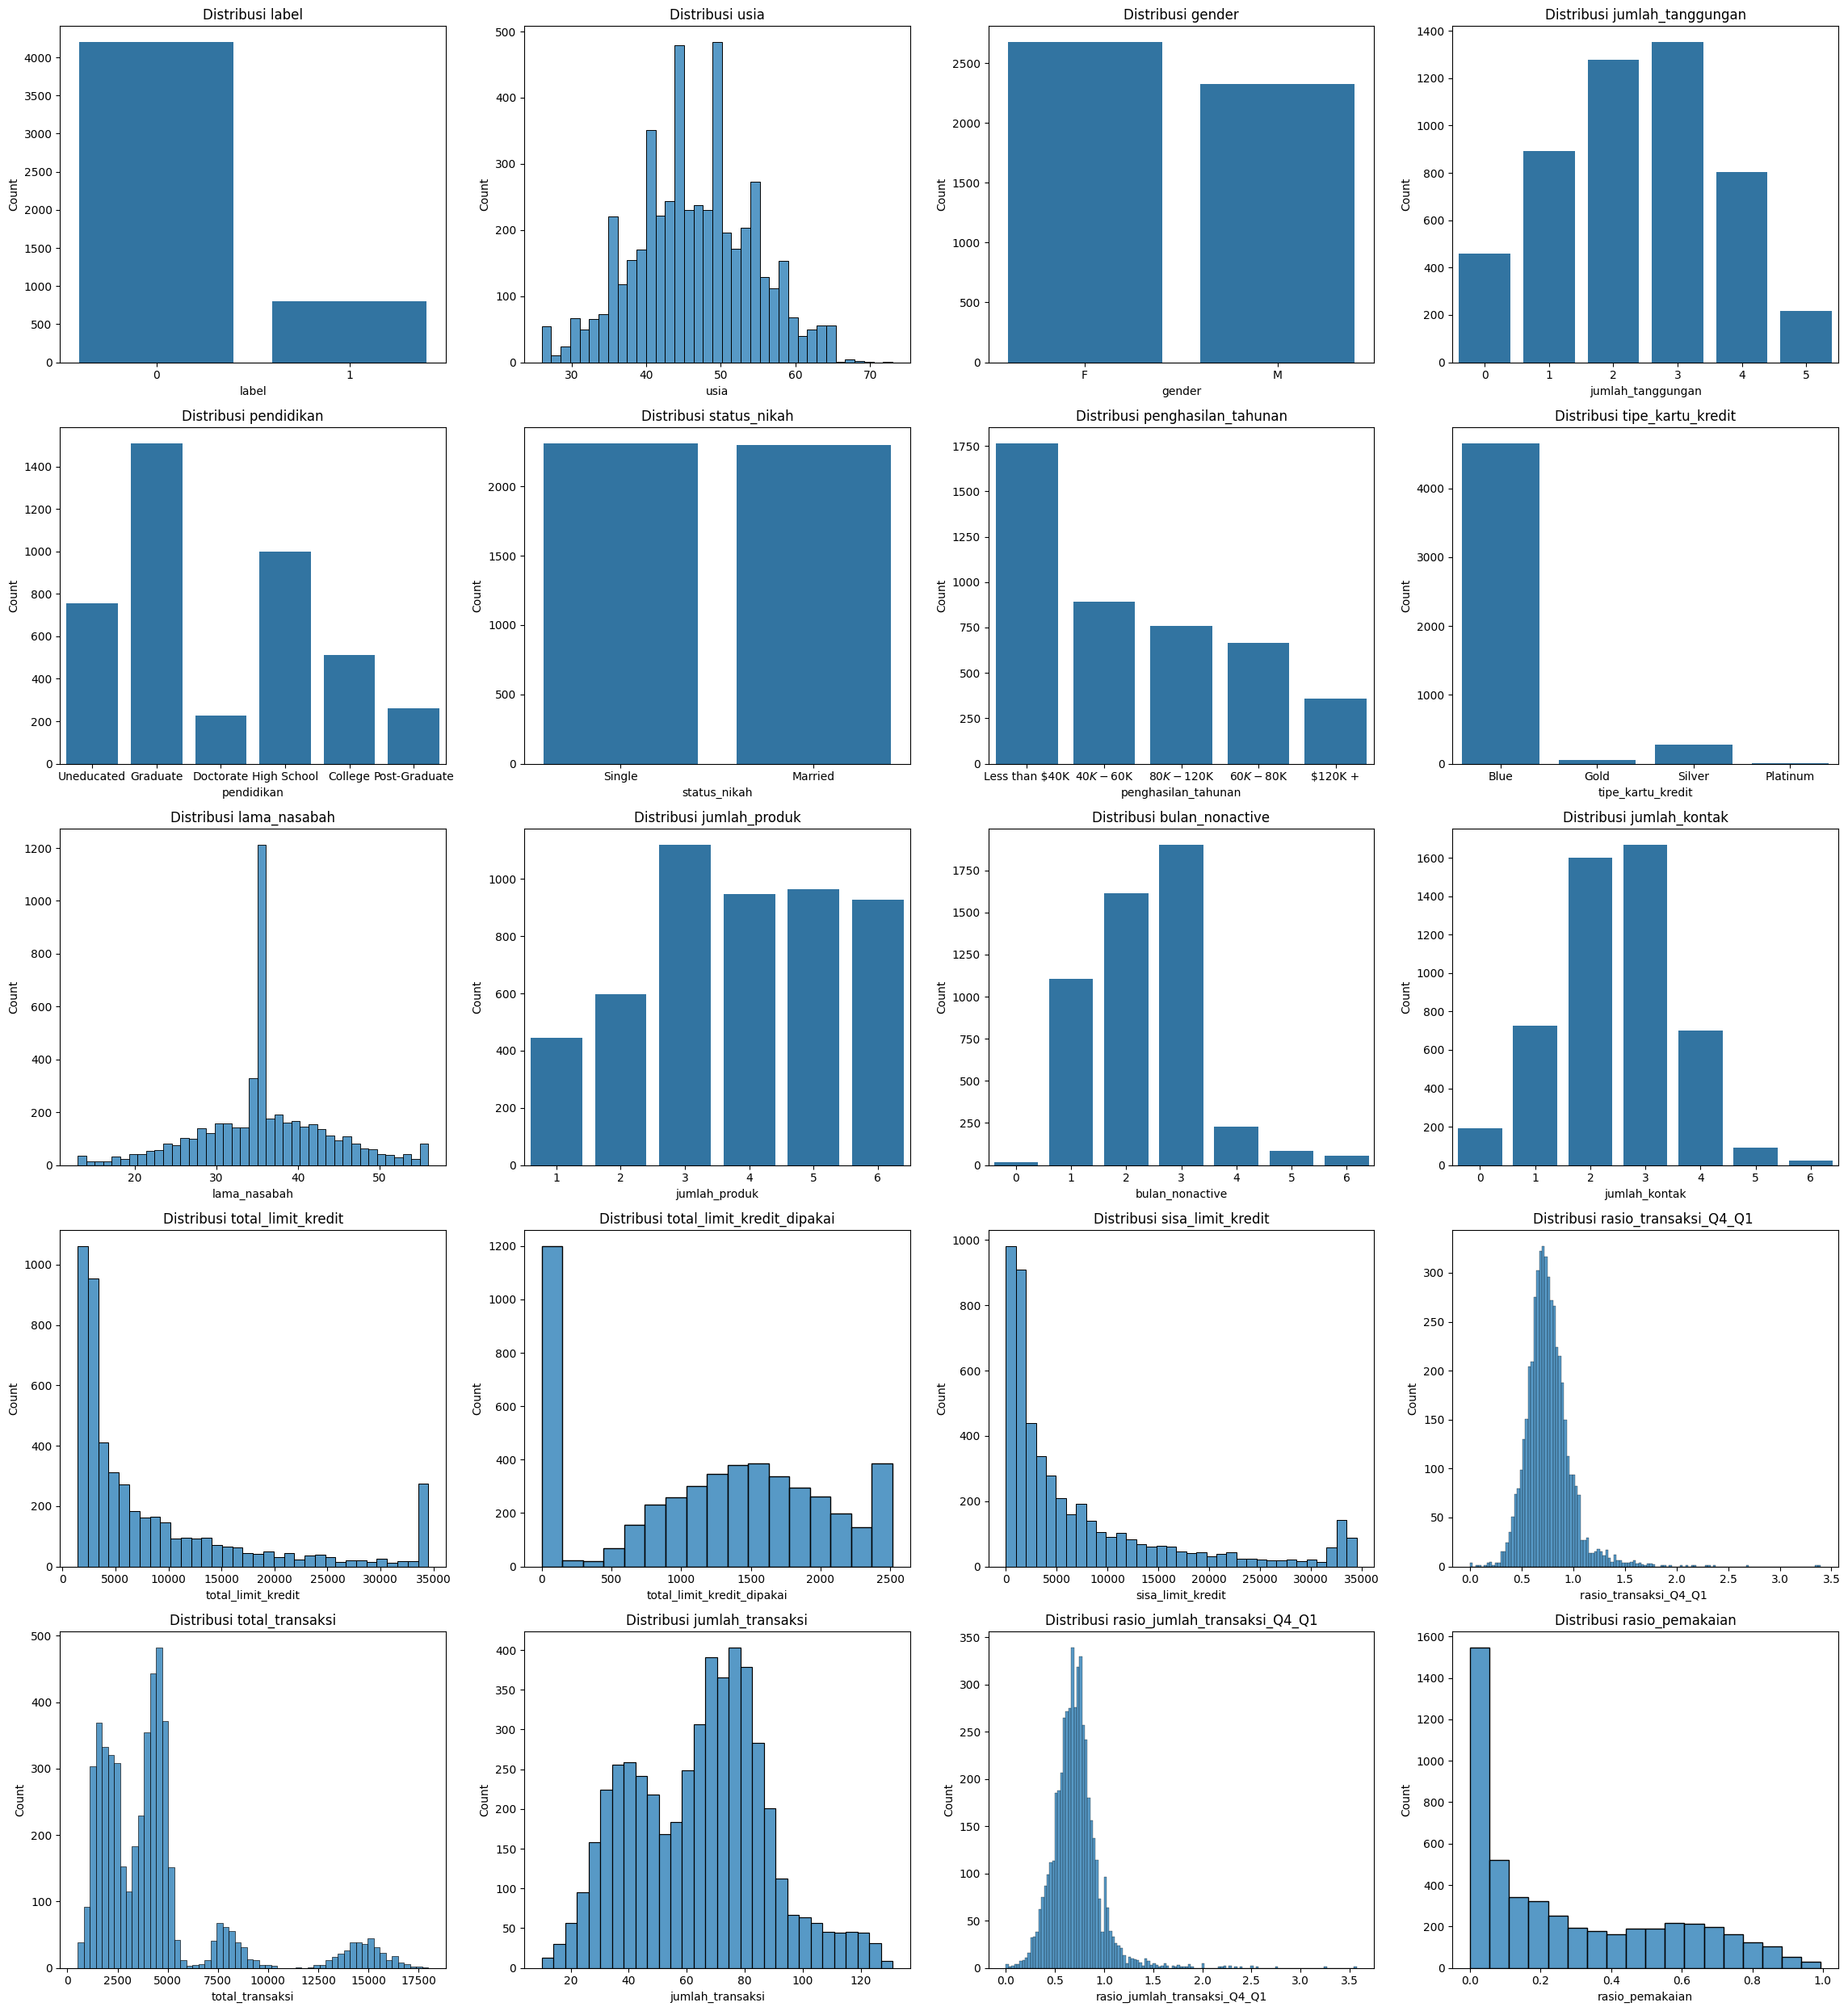

In [13]:
# Iterasi untuk melakukan analisis univariate dalam tata letak 4 kolom
num_cols = 4
num_univariate_plots = len(univariate_features)

plt.figure(figsize=(23, math.ceil(num_univariate_plots / num_cols) * 5))  # Mengatur ukuran gambar keseluruhan

# Analisis Univariate
for i, feature in enumerate(univariate_features):
    plt.subplot(math.ceil(num_univariate_plots / num_cols), num_cols, i + 1)
    if df[feature].dtype == 'object' or len(df[feature].unique()) < 20:
        sns.countplot(data=df, x=feature)
    else:
        sns.histplot(data=df, x=feature)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Bivariate Analysisis

In [14]:
# Definisi fitur yang ingin dianalisis
bivariate_features = ['usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

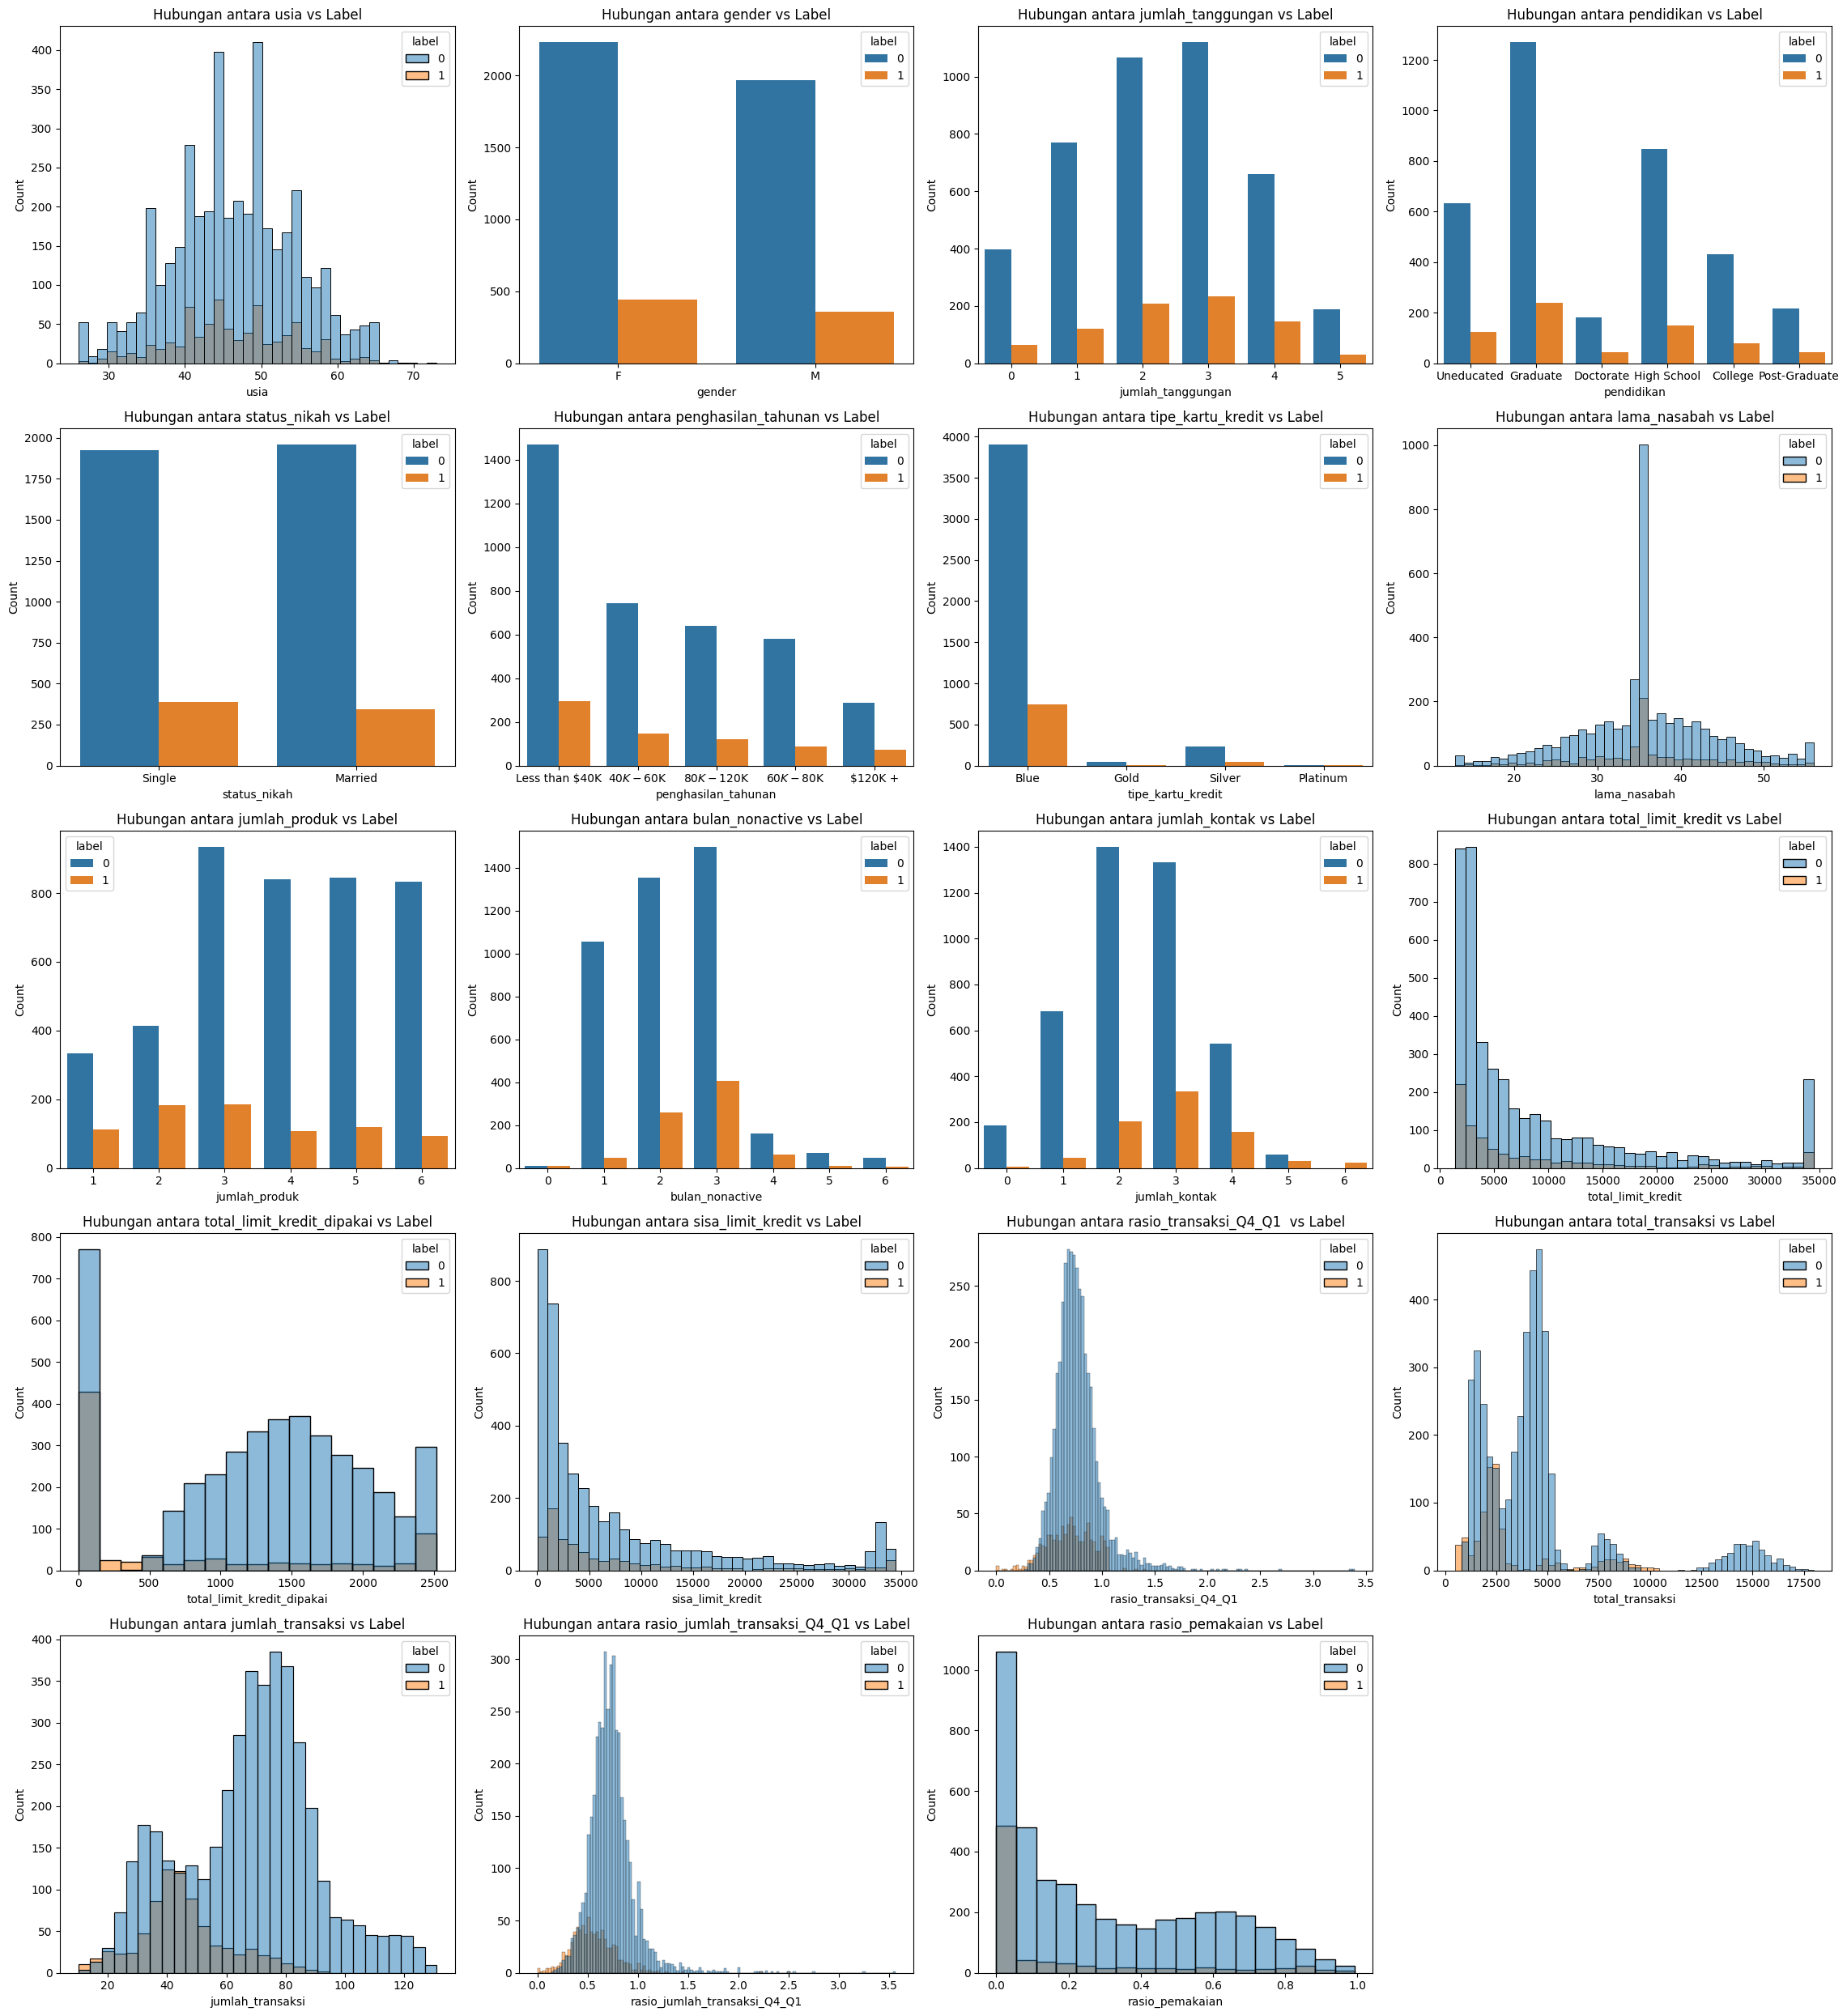

In [15]:
# Iterasi untuk melakukan analisis univariate dalam tata letak 4 kolom
num_cols = 4
num_bivariate_plots = len(bivariate_features)

plt.figure(figsize=(23, math.ceil(num_bivariate_plots / num_cols) * 5))  # Mengatur ukuran gambar keseluruhan

# Analisis Univariate
for i, feature in enumerate(bivariate_features):
    plt.subplot(math.ceil(num_bivariate_plots / num_cols), num_cols, i + 1)
    if df[feature].dtype == 'object' or len(df[feature].unique()) < 20:
        sns.countplot(data=df, x=feature, hue='label')
    else:
        sns.histplot(data=df, x=feature, hue='label')
    plt.title(f'Hubungan antara {feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Feature Selection

In [16]:
# Reducing Feature (Feature Selection)
df = df.drop(columns=['client_id']) # menghapus kolom client_id karena bernilai unik

## Age Binning

In [17]:
# Type Conversion -> Decoding (Numerik - Kategorikal) pada kolom 'usia'
age_binning  = [19,59,100]
age_category = ['dewasa','lansia'] # Pengkategorian usia menurut kemenkes -> https://ayosehat.kemkes.go.id/kategori-usia/dewasa

df['usia'] = pd.cut(df['usia'],bins=age_binning,labels=age_category)
df['usia'] = df['usia'].astype(str)
df['usia'].head(15)

0     dewasa
1     dewasa
2     dewasa
3     dewasa
4     dewasa
5     lansia
6     dewasa
7     dewasa
8     dewasa
9     dewasa
10    dewasa
11    dewasa
12    dewasa
13    dewasa
14    dewasa
Name: usia, dtype: object

## Imputasi missing value

In [18]:
# imputasi dengan modus
imputer = SimpleImputer(strategy='most_frequent')

df['pendidikan'] = imputer.fit_transform(df[['pendidikan']])[:, 0]
df['status_nikah'] = imputer.fit_transform(df[['status_nikah']])[:, 0]
df['penghasilan_tahunan'] = imputer.fit_transform(df[['penghasilan_tahunan']])[:, 0]

## Normalisasi

In [19]:
scaler = MinMaxScaler()

num_columns = ['jumlah_tanggungan', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

df[num_columns] = scaler.fit_transform(df[num_columns])

df.head()

,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,0,dewasa,F,0.6,Uneducated,Single,Less than $40K,Blue,0.604651,0.6,0.500000,0.666667,0.046941,0.599126,0.042577,0.206947,0.184387,0.446281,0.246990,0.507042
1,0,dewasa,M,0.2,Uneducated,Single,Less than $40K,Blue,0.930233,0.8,0.833333,0.666667,0.022786,0.623361,0.017651,0.207830,0.200172,0.570248,0.200784,0.720322
2,0,dewasa,F,0.4,Graduate,Single,Less than $40K,Blue,0.534884,0.6,0.500000,0.500000,0.008940,0.392133,0.021245,0.258758,0.241178,0.471074,0.255951,0.572435
3,0,dewasa,M,0.6,Doctorate,Single,$40K - $60K,Blue,0.534884,0.6,0.333333,0.500000,0.101207,0.602304,0.094371,0.276715,0.255247,0.528926,0.238029,0.318913
4,0,dewasa,M,0.6,Graduate,Single,$80K - $120K,Blue,0.465116,0.4,0.500000,0.333333,0.068799,0.862137,0.044345,0.154254,0.053989,0.206612,0.146178,0.587525


## Encoding Data Kategorikal

### Data Kategorikal

In [20]:
cat_columns = ['gender', 'status_nikah']

ohe = OneHotEncoder(sparse_output=False)

# Fit dan transform kolom kategorikal
encoded_array = ohe.fit_transform(df[cat_columns])

# Ubah hasil encoding jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cat_columns), index=df.index)

# Gabungkan kembali dengan df dan drop kolom aslinya
df = pd.concat([df.drop(columns=cat_columns), encoded_df], axis=1)

df.head()

,label,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,...,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_F,gender_M,status_nikah_Married,status_nikah_Single
0,0,dewasa,0.6,Uneducated,Less than $40K,Blue,0.604651,0.6,0.500000,0.666667,...,0.042577,0.206947,0.184387,0.446281,0.246990,0.507042,1.0,0.0,0.0,1.0
1,0,dewasa,0.2,Uneducated,Less than $40K,Blue,0.930233,0.8,0.833333,0.666667,...,0.017651,0.207830,0.200172,0.570248,0.200784,0.720322,0.0,1.0,0.0,1.0
2,0,dewasa,0.4,Graduate,Less than $40K,Blue,0.534884,0.6,0.500000,0.500000,...,0.021245,0.258758,0.241178,0.471074,0.255951,0.572435,1.0,0.0,0.0,1.0
3,0,dewasa,0.6,Doctorate,$40K - $60K,Blue,0.534884,0.6,0.333333,0.500000,...,0.094371,0.276715,0.255247,0.528926,0.238029,0.318913,0.0,1.0,0.0,1.0
4,0,dewasa,0.6,Graduate,$80K - $120K,Blue,0.465116,0.4,0.500000,0.333333,...,0.044345,0.154254,0.053989,0.206612,0.146178,0.587525,0.0,1.0,0.0,1.0


### Data Kategorikal Ordinal

In [21]:
cat_ordinal_columns = ['usia', 'pendidikan', 'penghasilan_tahunan', 'tipe_kartu_kredit']

# Mendefinisikan urutan nilai pada kolom pendidikan, penghasilan_tahunan dan tipe_kartu_kredit
# age_categories = ['dewasa','lansia']
# education_categories = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
# income_categories = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
# credit_card_categories = ['Blue', 'Silver', 'Gold', 'Platinum']

ordinal_categories = [
    ['dewasa', 'lansia'],  # usia
    ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],  # pendidikan
    ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],  # penghasilan_tahunan
    ['Blue', 'Silver', 'Gold', 'Platinum']  # tipe_kartu_kredit
]

OE = OrdinalEncoder(categories=ordinal_categories)
df[cat_ordinal_columns] = OE.fit_transform(df[cat_ordinal_columns])

df.head()

,label,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,...,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_F,gender_M,status_nikah_Married,status_nikah_Single
0,0,0.0,0.6,0.0,0.0,0.0,0.604651,0.6,0.500000,0.666667,...,0.042577,0.206947,0.184387,0.446281,0.246990,0.507042,1.0,0.0,0.0,1.0
1,0,0.0,0.2,0.0,0.0,0.0,0.930233,0.8,0.833333,0.666667,...,0.017651,0.207830,0.200172,0.570248,0.200784,0.720322,0.0,1.0,0.0,1.0
2,0,0.0,0.4,3.0,0.0,0.0,0.534884,0.6,0.500000,0.500000,...,0.021245,0.258758,0.241178,0.471074,0.255951,0.572435,1.0,0.0,0.0,1.0
3,0,0.0,0.6,5.0,1.0,0.0,0.534884,0.6,0.333333,0.500000,...,0.094371,0.276715,0.255247,0.528926,0.238029,0.318913,0.0,1.0,0.0,1.0
4,0,0.0,0.6,3.0,3.0,0.0,0.465116,0.4,0.500000,0.333333,...,0.044345,0.154254,0.053989,0.206612,0.146178,0.587525,0.0,1.0,0.0,1.0


Preprocessing selesai